In [9]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pandas as pd
from handyspark import *
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

In [74]:
#install required libraries

#!pip install pyspark_dist_explore
#!pip install handyspark
#!pip install pyspark

In [10]:
#Created mongoDB database - amazon_reviews and collection - reviews. This collections data from 5 product categories - Arts,
#Beauty, Electronics, Cellphones&Accessories, Home&Kitchen. Size of the collection is around 1GB

my_spark = SparkSession \
    .builder \
    .appName("myApp") \
    .master("local[*]") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/amazon_reviews.reviews") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/amazon_reviews.reviews") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
    .getOrCreate()

In [11]:
data = my_spark.read.format("mongo")

In [12]:
data

In [13]:
df = data.load()

In [14]:
df = df.withColumn("review/score", df["review/score"].cast(IntegerType()))

In [15]:
df.printSchema()


root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- product/category: string (nullable = true)
 |-- product/productId: string (nullable = true)
 |-- product/title: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: integer (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)



In [16]:
df.show(4)

+--------------------+----------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|                 _id|product/category|product/productId|       product/title|review/helpfulness|review/score|      review/summary|         review/text|
+--------------------+----------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|{637859eaf3dc06be...|  Home_&_Kitchen|       B00017HOWY|            Foamagic|               2/2|           5|Woo wee - I'm goi...|Anyone who buys l...|
|{637859eaf3dc06be...|  Home_&_Kitchen|       B0006861QI|Uniflame 4 Panel ...|               5/5|           1|  Very poor quality.|The screen arrive...|
|{637859eaf3dc06be...|  Home_&_Kitchen|       B0006861QI|Uniflame 4 Panel ...|               3/3|           5|Fits well into ou...|Though it would b...|
|{637859eaf3dc06be...|  Home_&_Kitchen|       B0006861QI|Uniflame 4 Panel ...|    

## Data Visualizations

### Top 3 Product categories wrt. number of reviews

In [17]:
review_cnt_df = df.groupby(['product/category']).count()
high_rev_prods = review_cnt_df.sort(col('count').desc())
high_rev_prods.select('product/category').show(truncate=False, n=3)

+----------------+
|product/category|
+----------------+
|Electronics     |
|Home_&_Kitchen  |
|Beauty          |
+----------------+
only showing top 3 rows



### Pie chart  to represent distribution of number of reviews across products

<AxesSubplot:ylabel='count'>

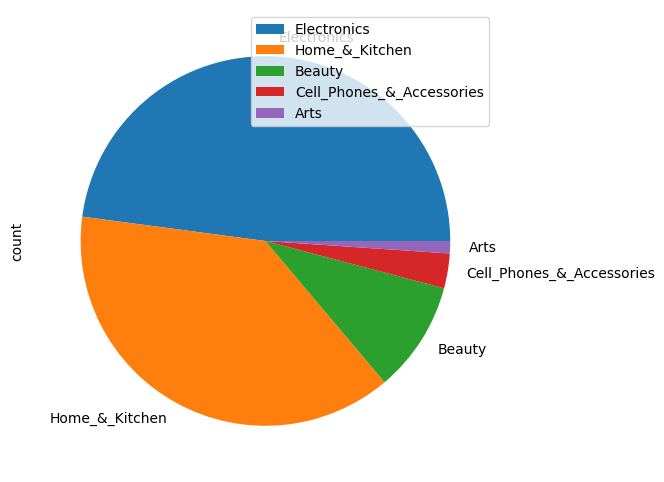

In [76]:
pandas_df = high_rev_prods.toPandas()
pandas_df = pandas_df.set_index('product/category')
pandas_df.plot.pie(y='count', figsize=(6, 6))

### Total number of reviews per rating/score

(array([ 333095.,       0.,       0.,       0.,       0.,  164867.,
              0.,       0.,       0.,       0.,  207375.,       0.,
              0.,       0.,       0.,  489202.,       0.,       0.,
              0., 1397999.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

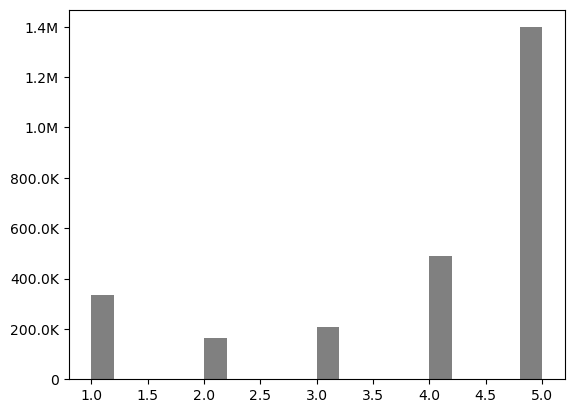

In [73]:
fig, ax = plt.subplots()
hist(ax, df.select('review/score'), bins = 20, color=['grey'])


In [39]:
beauty_df = df.filter(col("product/category") == "Beauty").select(col('review/score').alias('beauty'))
electronics_df = df.filter(col("product/category") == "Electronics").select(col('review/score').alias('electronics'))
home_kit_df = df.filter(col("product/category") == "Home_&_Kitchen").select(col('review/score').alias('home&kit'))

### Histogram to represent number of Beauty product reviews distributed across 5 ratings 

Text(0.5, 1.0, 'Beauty')

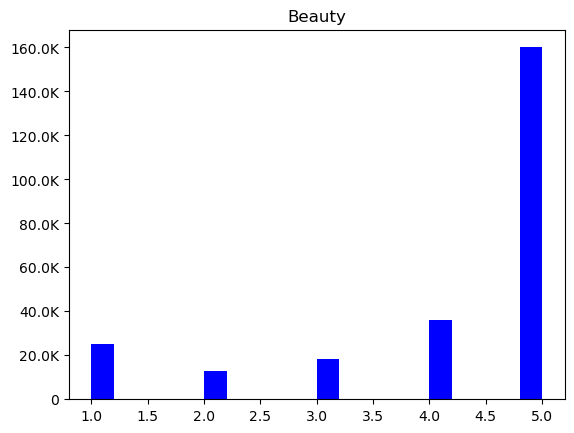

In [43]:
fig, ax = plt.subplots()
hist(ax, beauty_df, bins = 20, color=['blue'])
ax.set_title('Beauty')


### Histogram to represent number of Electronics product reviews distributed across 5 ratings 

Text(0.5, 1.0, 'Electronics')

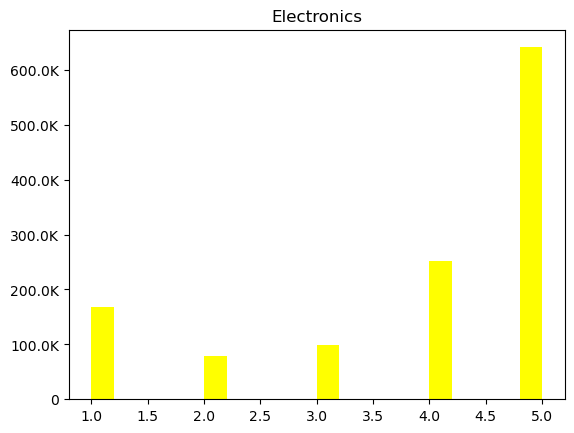

In [44]:
fig, ax = plt.subplots()
hist(ax, electronics_df, bins = 20, color=['yellow'])
ax.set_title('Electronics')


### Histogram to represent number of Home&Kitchen product reviews distributed across 5 ratings 

Text(0.5, 1.0, 'Home_kit')

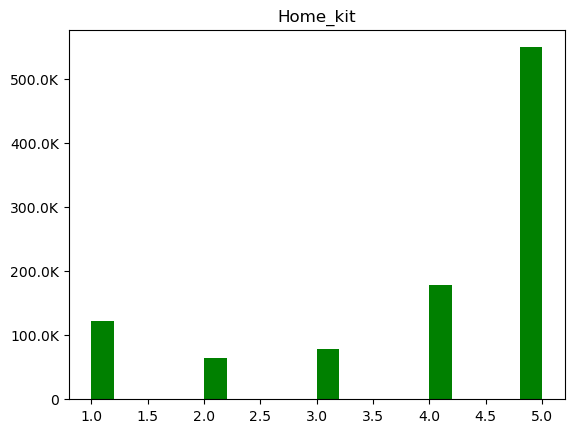

In [45]:
fig, ax = plt.subplots()
hist(ax, home_kit_df, bins = 20, color=['green'])
ax.set_title('Home_kit')